In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import corner
import numpy as np
import matplotlib.pyplot as plt

import sys 
sys.path.append('..')
from functions import *
from colormaps import new_colors

3.0rc1


In [12]:
config = parse_config('/Users/fardila/Documents/GitHub/dwarf_lensing/MCMC/mcmc_config_{0}.yaml'.format(str(6)))
config, cosmos_data, sim_data = initial_model(config)


5SHMR+scatter


In [16]:
param=config['param_ini']
sim_data['model'] = PrebuiltSubhaloModelFactory('behroozi10', redshift=config['sim_z'],
                                        scatter_abscissa=[12, 15],
                                        scatter_ordinates=[param[0], param[1]])

In [17]:
mock_galaxies = sim_data['model'].mock.galaxy_table
mock_galaxies = mock_galaxies['x', 'y', 'z', 'stellar_mass']
mock_galaxies = np.array(mock_galaxies[(np.log10(mock_galaxies['stellar_mass'])>=min(cosmos_data['cosmos_dwarf_masses'])) & \
                              (np.log10(mock_galaxies['stellar_mass'])<9.0)])
# half_mock_galaxies = np.random.choice(mock_galaxies,500000)
print('cut galaxies table', len(mock_galaxies))

galaxies_table= create_dwarf_catalog_with_matched_mass_distribution(cosmos_data['cosmos_dwarf_masses'],
                                                                mock_galaxies,
                                                                n_nearest = n_nearest)

AttributeError: 'PrebuiltSubhaloModelFactory' object has no attribute 'mock'

In [ ]:
plt.hist(galaxies_table['x'])

In [9]:
def make_analysis_plots_npz(run):
    config = parse_config('/Users/fardila/Documents/GitHub/dwarf_lensing/MCMC/conifg/mcmc_config_{0}.yaml'.format(str(run)))
    config, cosmos_data, sim_data = initial_model(config)
    
    mcmc_array = np.load('outfiles/cosmos_bplanck_run_{}.npz'.format(str(run)))
    samples = mcmc_array['samples']
                         
    #corner plot
    fig = corner.corner(samples, labels=config['param_labels_latex'],
                      truths=config['param_ini'], truth_color='r')
    plt.show()
                         
    #step plots
    f, axes = plt.subplots(7, 1, sharex=True, figsize=[10,30])

    for walker in mcmc_array['chains']:
        for parameter in range(config['mcmc_ndims']):
            param_chain = [s[parameter] for s in walker]
            axes[parameter].plot(range(len(param_chain)), param_chain, color=new_colors[parameter], alpha=0.4)
            axes[parameter].set_ylabel(config['param_labels_latex'][parameter], color=new_colors[parameter], fontsize=30)
    plt.xlabel('Step') 
    plt.show()
                         
    #plot best
    plot_from_params(mcmc_array['best'], config, cosmos_data, sim_data)
    plt.show()
                         
    return mcmc_array

# run 1 

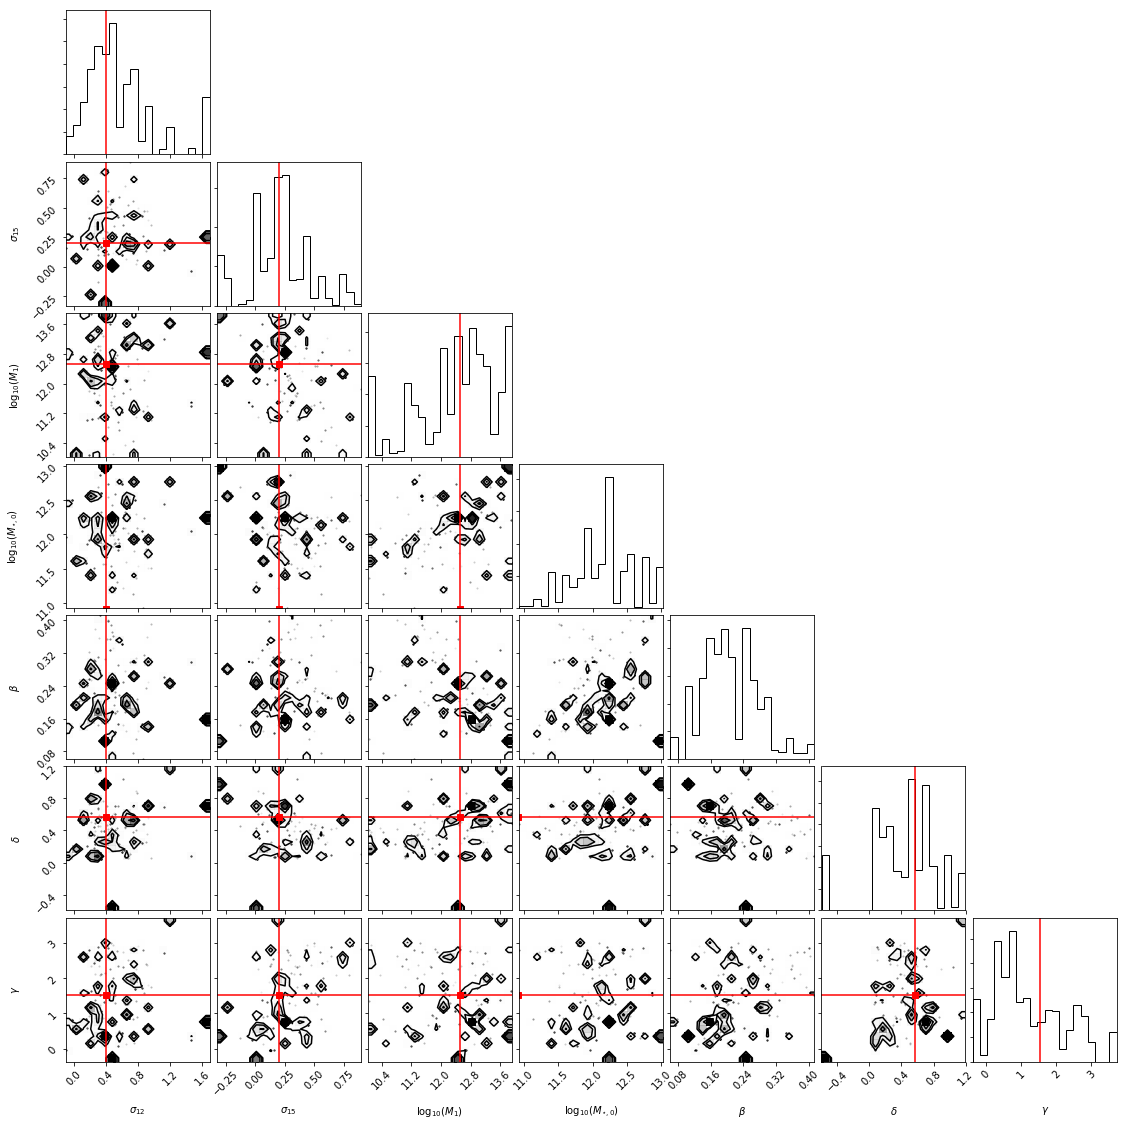

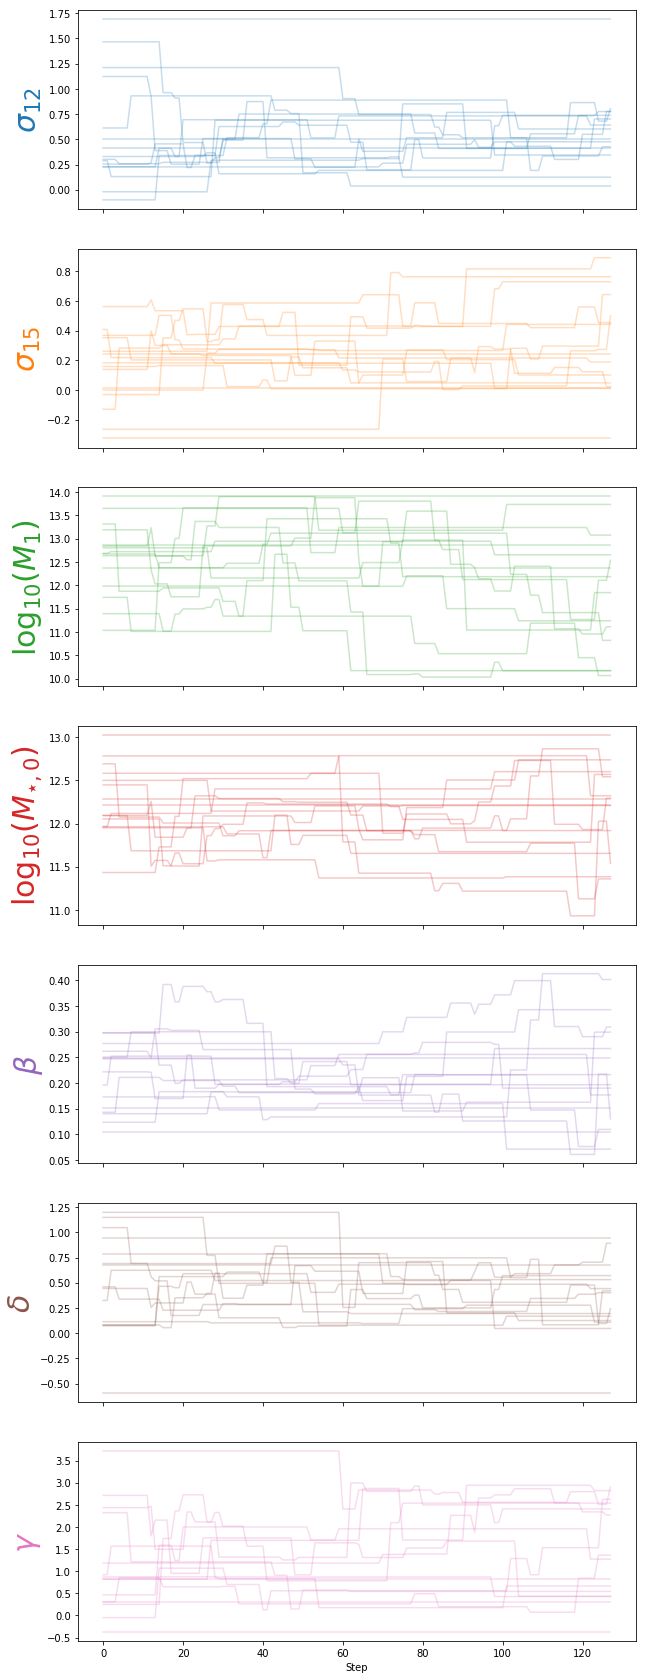

mock.populate
{u'smhm_beta_0': 0.3429365143064401, u'smhm_delta_0': 0.12515170098484457, u'smhm_m0_0': 12.738418876764625, u'smhm_m1_a': 0, u'smhm_m0_a': 0, u'smhm_beta_a': 0, u'smhm_gamma_0': 0.43421947842172237, u'smhm_gamma_a': 0, u'smhm_m1_0': 11.239953792701078, u'scatter_model_param2': 0.10106443741995232, u'smhm_delta_a': 0, u'scatter_model_param1': 0.6028827365584721}
SMF computed
cut galaxies table 1540938
Ks_2sampResult(statistic=0.000711007691810428, pvalue=0.9999999999999993)
DS computed


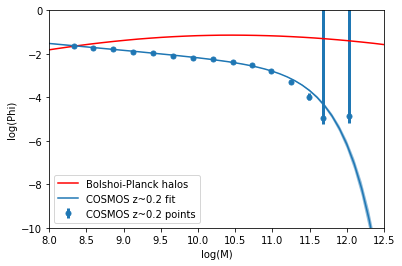

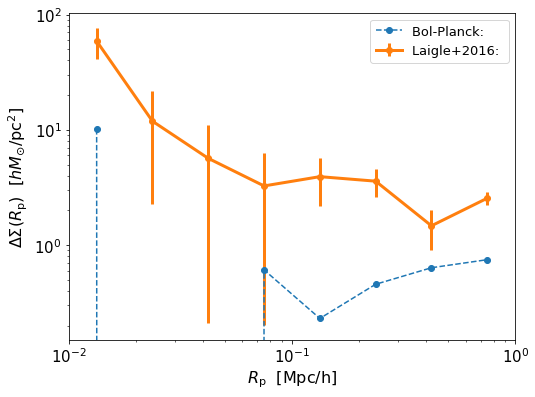

In [26]:
make_analysis_plots(1)

# run 2 

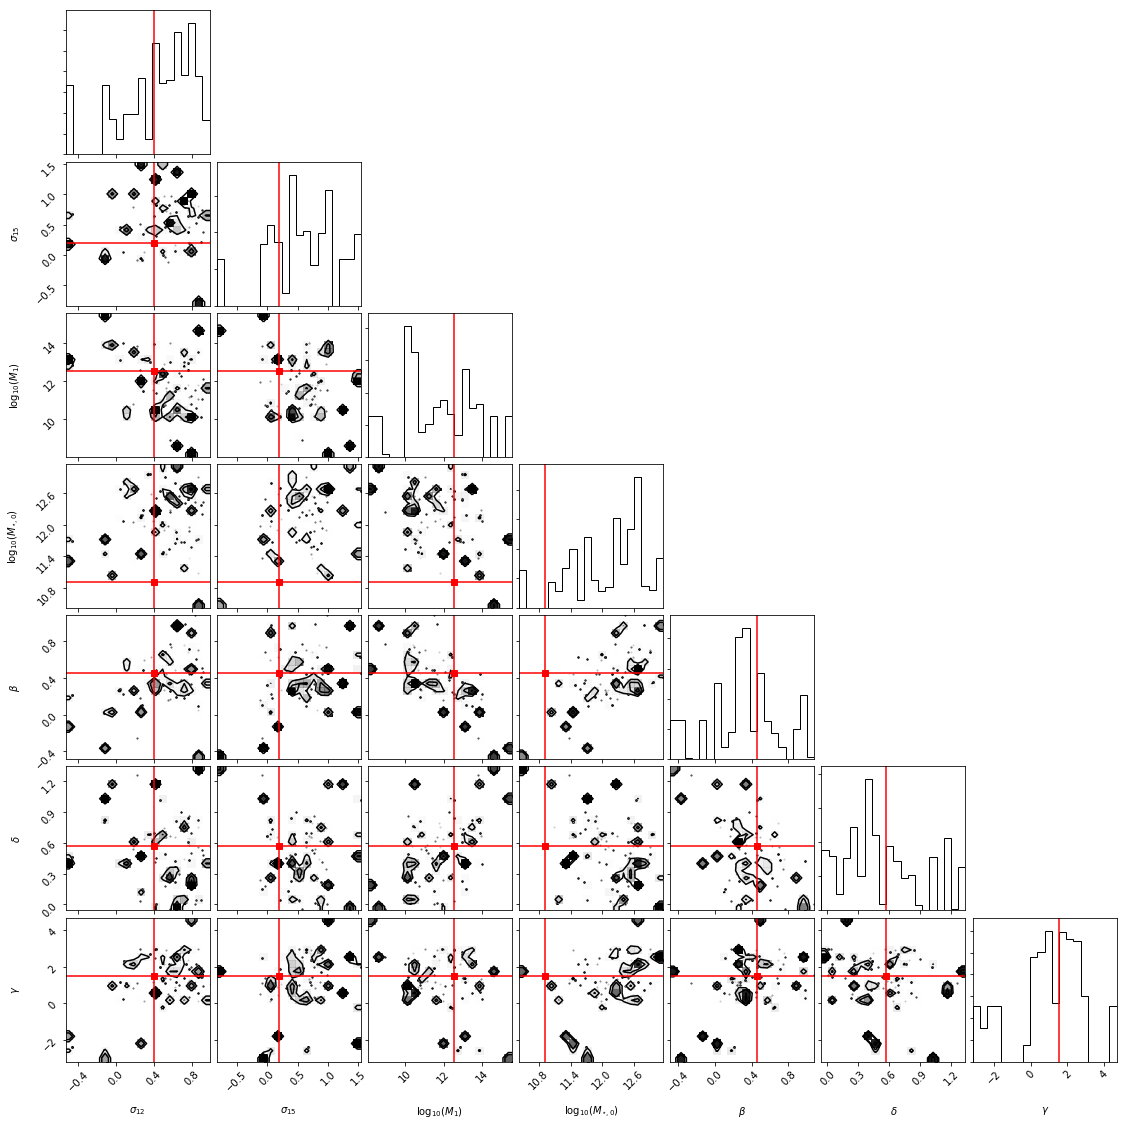

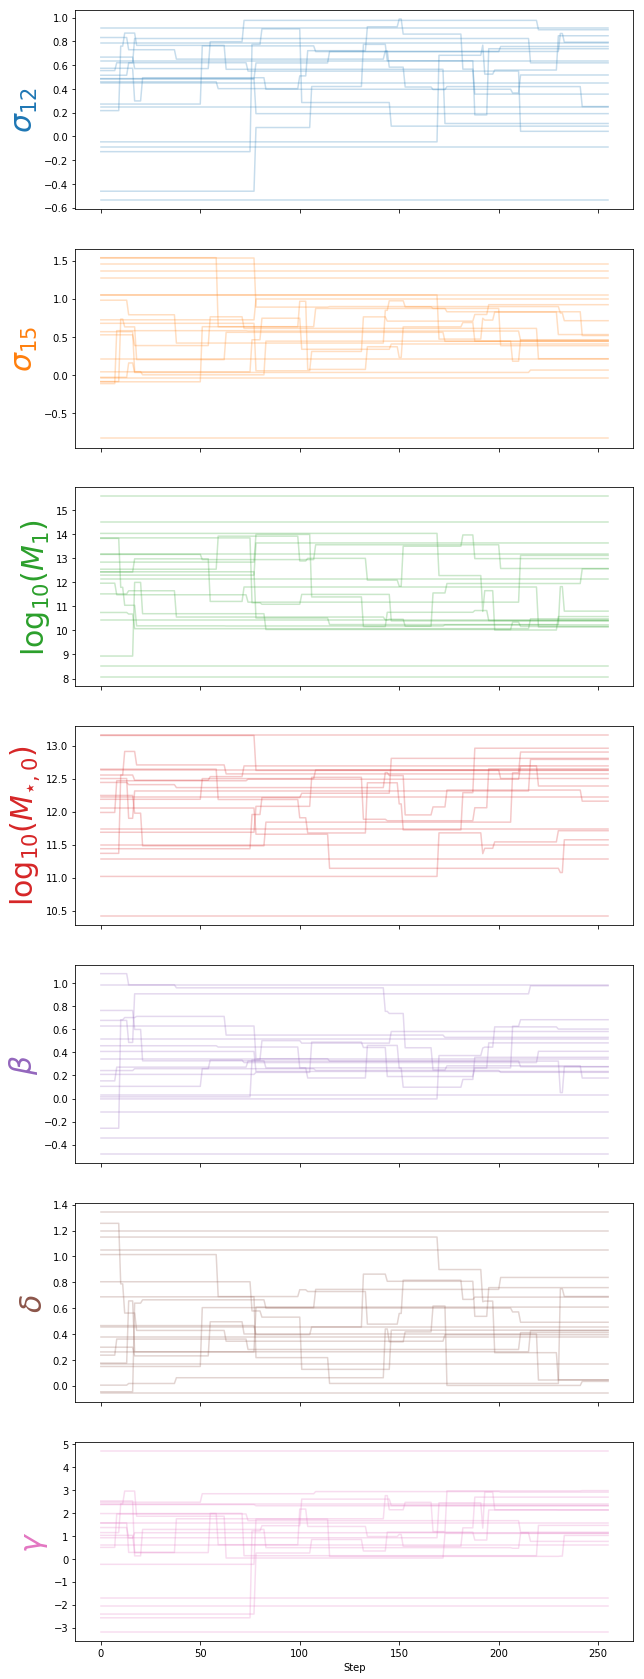

mock.populate
{u'smhm_beta_0': 0.5801694804438852, u'smhm_delta_0': 0.42980477666766714, u'smhm_m0_0': 12.8068185489355, u'smhm_m1_a': 0, u'smhm_m0_a': 0, u'smhm_beta_a': 0, u'smhm_gamma_0': 2.3292133615879163, u'smhm_gamma_a': 0, u'smhm_m1_0': 10.392839435519042, u'scatter_model_param2': 0.4080495514420702, u'smhm_delta_a': 0, u'scatter_model_param1': 0.08664164614453107}
SMF computed
cut galaxies table 0
Too few mock dwarfs!
DS computed


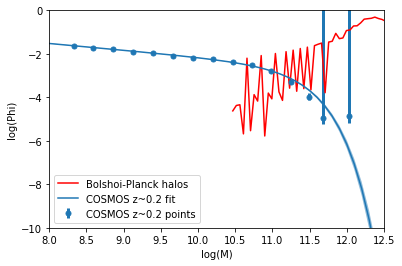

/Users/fardila/anaconda/envs/dwarf_lensing/lib/python2.7/site-packages/matplotlib/ticker.py:2207: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


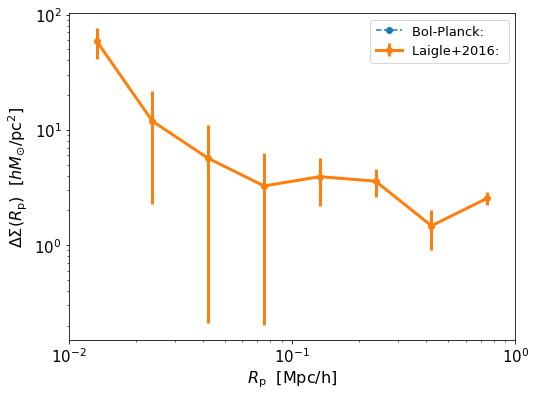

In [27]:
make_analysis_plots(2)

# run 3

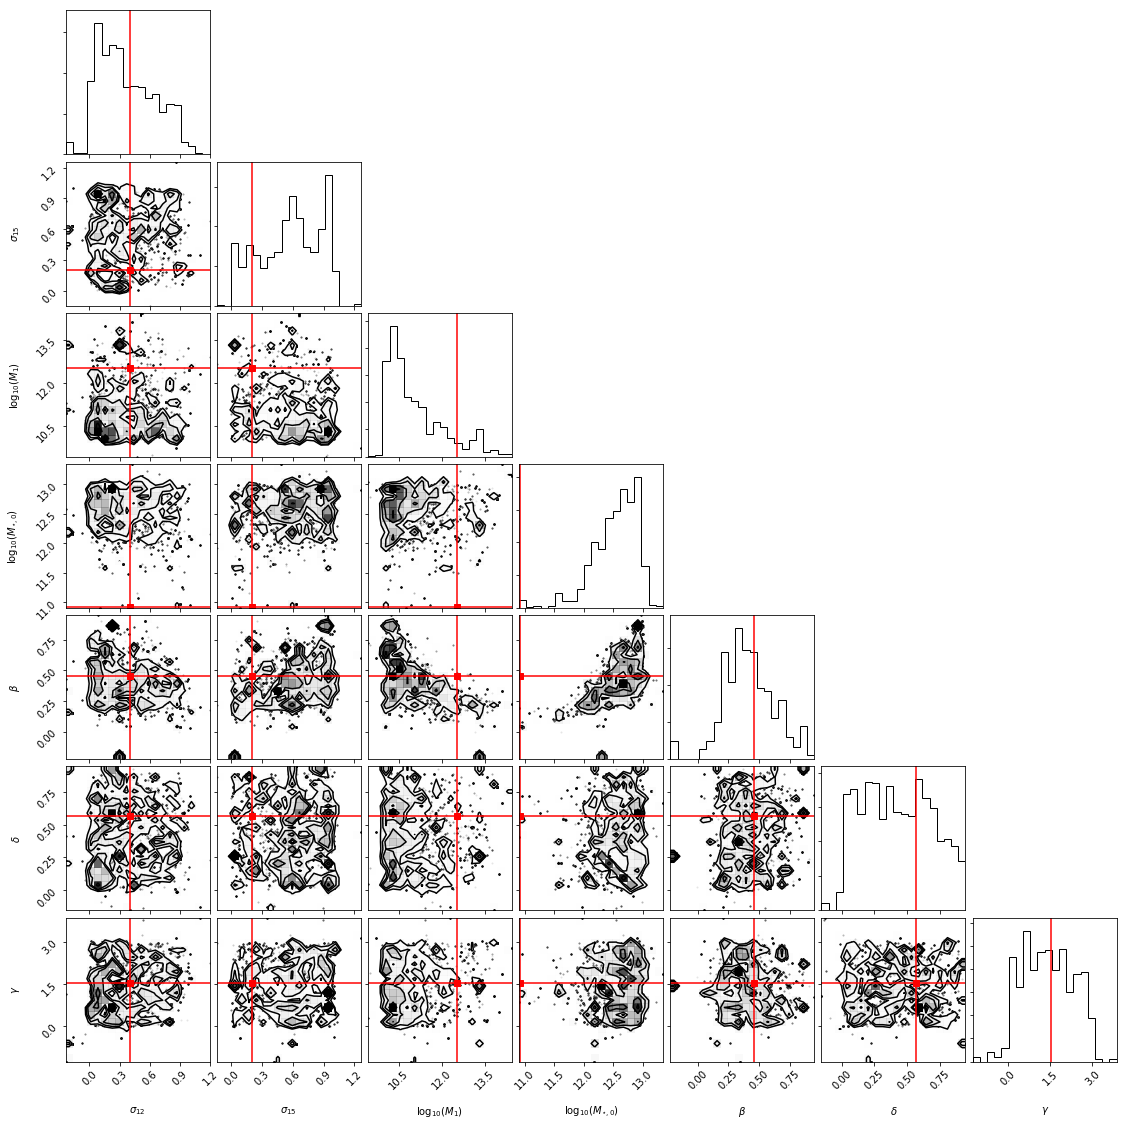

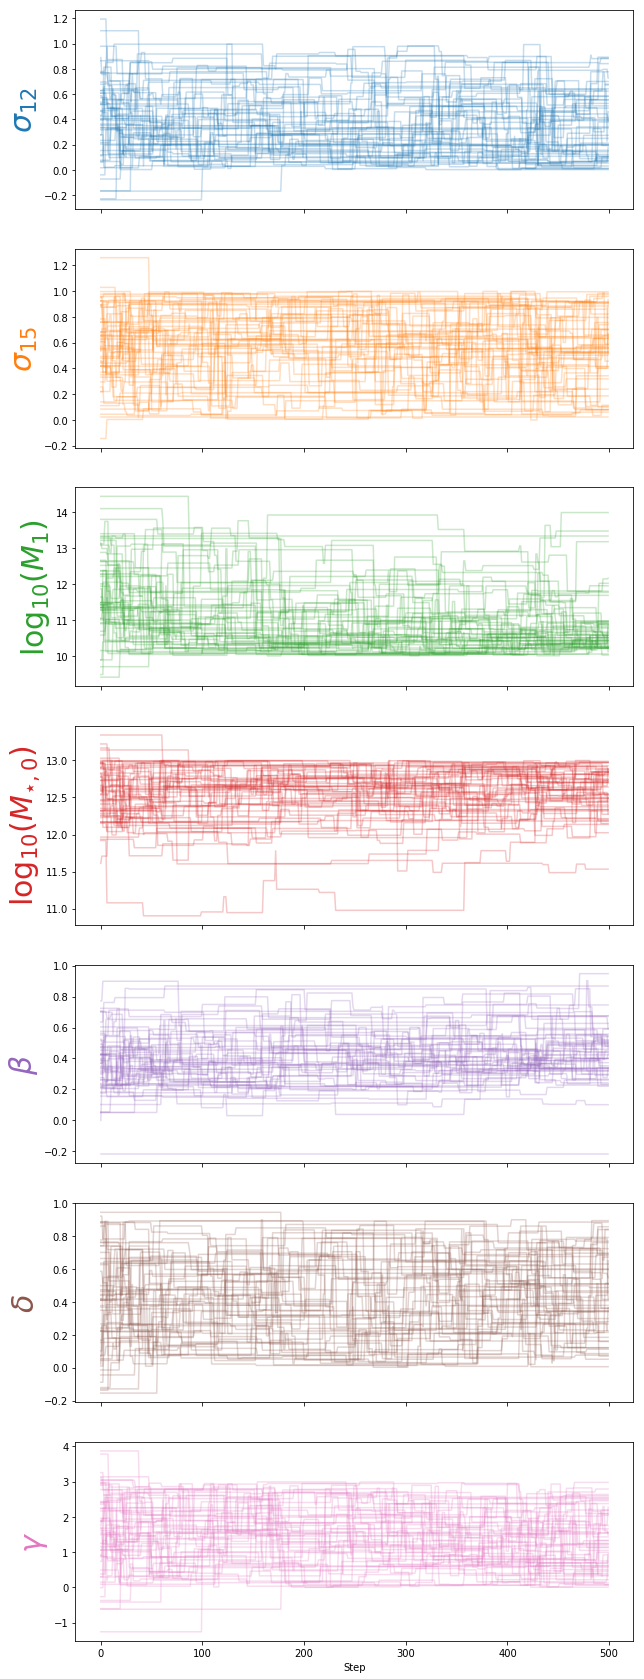

mock.populate
{u'smhm_beta_0': 0.5571910548265355, u'smhm_delta_0': 0.7911935781093474, u'smhm_m0_0': 12.985976535775238, u'smhm_m1_a': 0, u'smhm_m0_a': 0, u'smhm_beta_a': 0, u'smhm_gamma_0': 2.6376098416982683, u'smhm_gamma_a': 0, u'smhm_m1_0': 10.508778637183996, u'scatter_model_param2': 0.3191207208121521, u'smhm_delta_a': 0, u'scatter_model_param1': 0.5068560580784922}
SMF computed
cut galaxies table 1021
Too few mock dwarfs!
DS computed


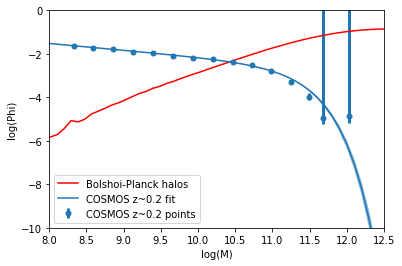

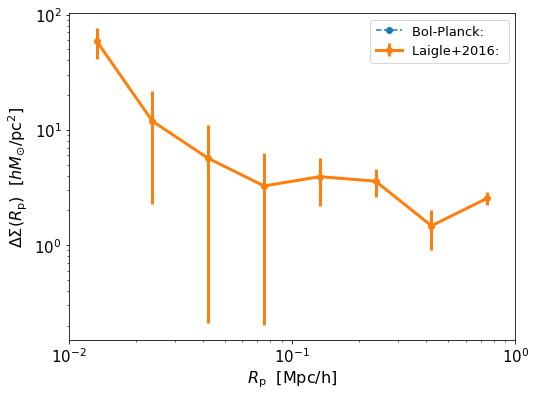

In [28]:
make_analysis_plots(3)

# run 4 

3.0rc1


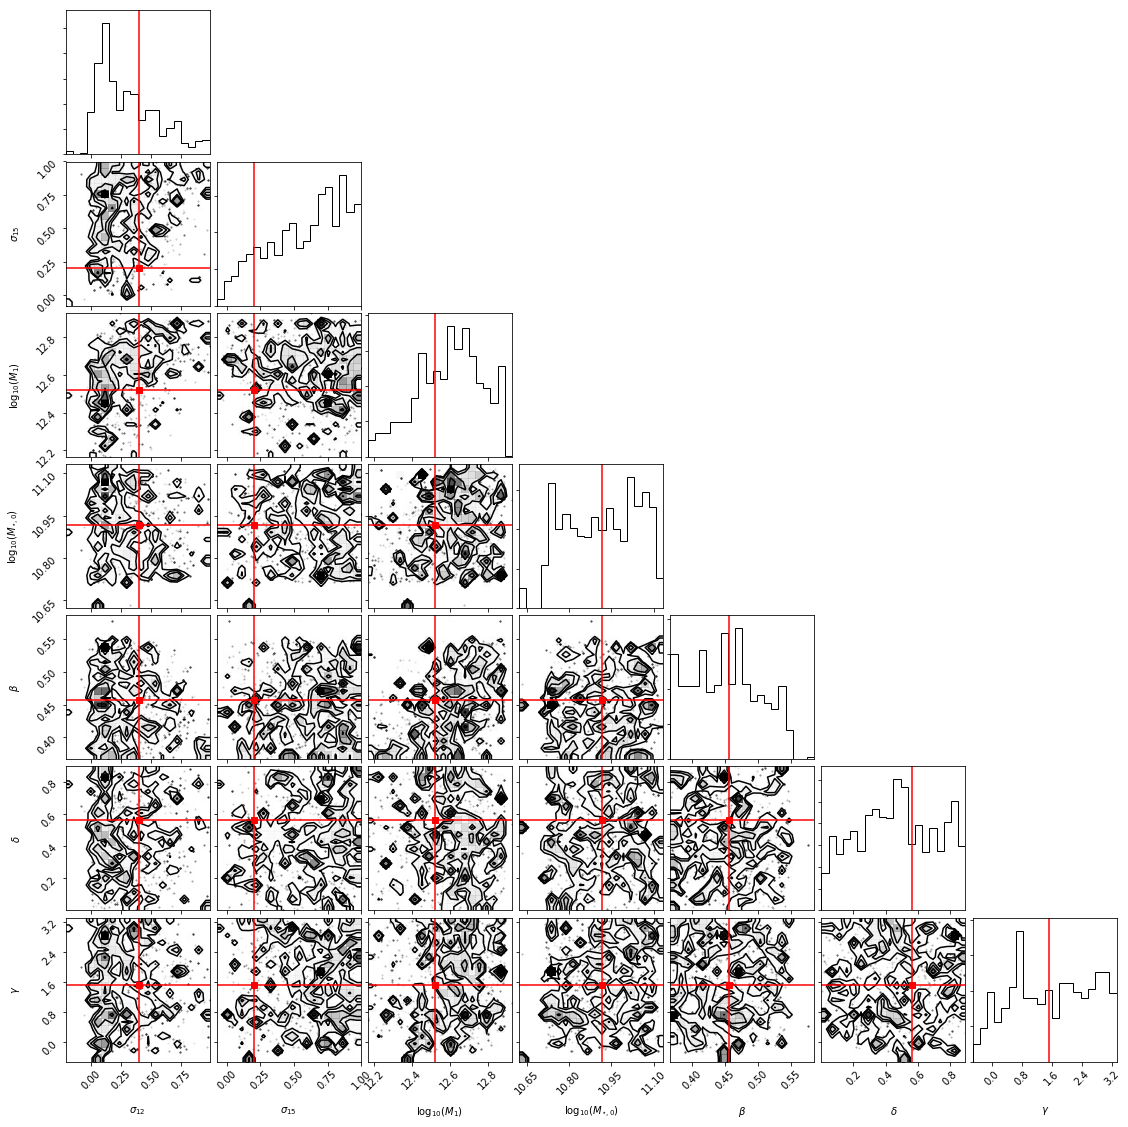

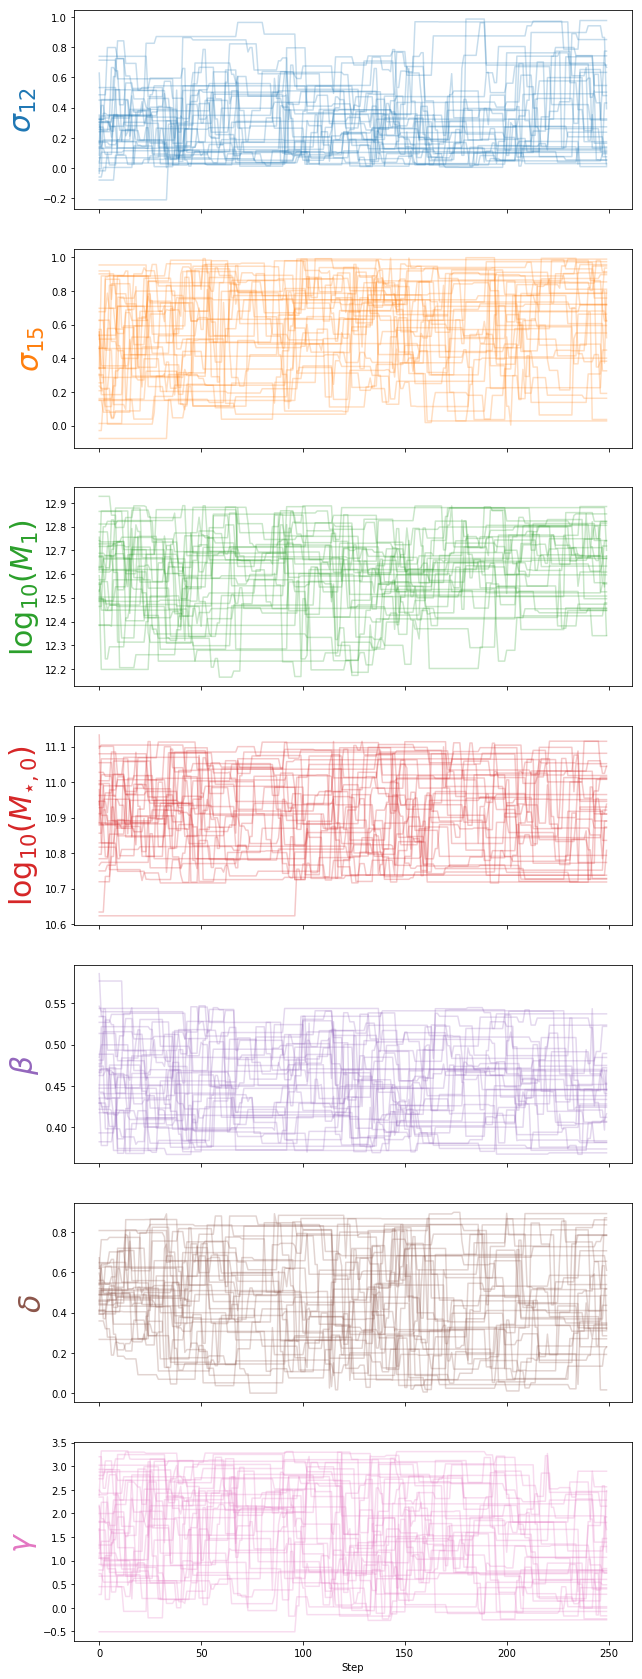

mock.populate
{u'smhm_beta_0': 0.4382279593705897, u'smhm_delta_0': 0.19259536635636484, u'smhm_m0_0': 10.718754050863726, u'smhm_m1_a': 0, u'smhm_m0_a': 0, u'smhm_beta_a': 0, u'smhm_gamma_0': 0.7423853399382417, u'smhm_gamma_a': 0, u'smhm_m1_0': 12.666570180725875, u'scatter_model_param2': 0.027782654222497982, u'smhm_delta_a': 0, u'scatter_model_param1': 0.2728266009911515}
SMF computed
cut galaxies table 849138


KeyboardInterrupt: 

In [32]:
make_analysis_plots(4)

# run 5 

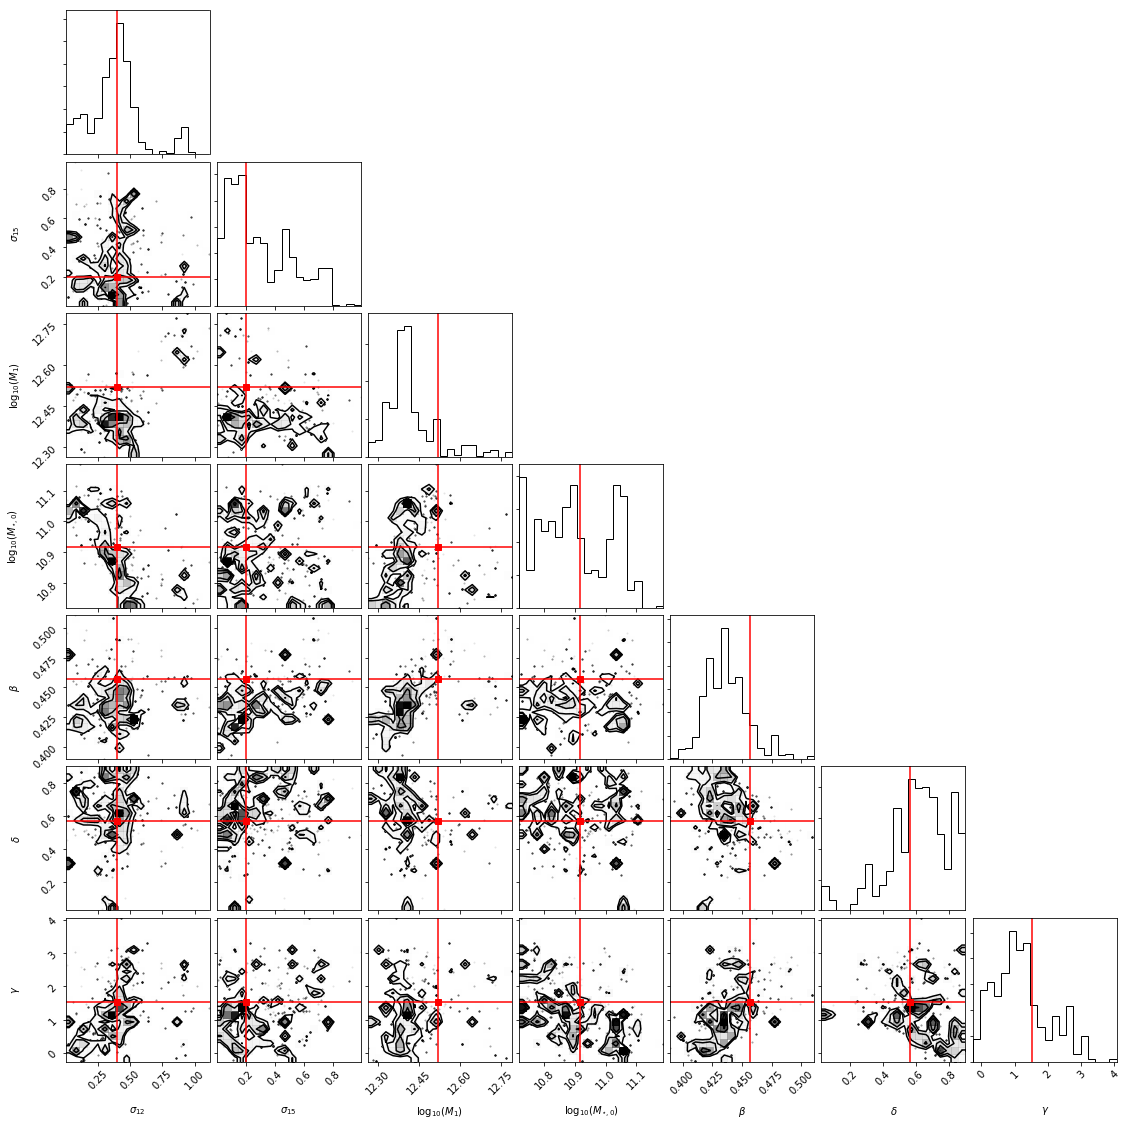

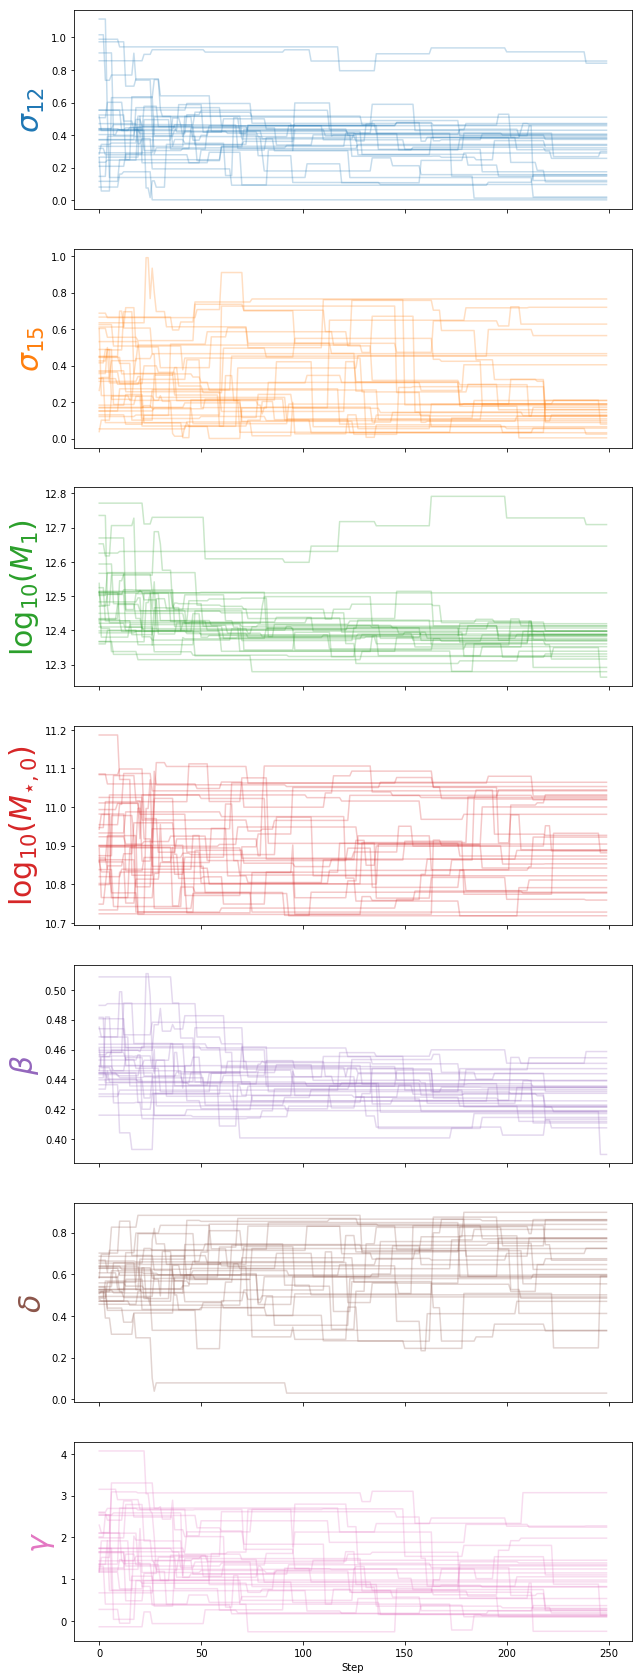

mock.populate
{u'smhm_beta_0': 0.4107699658232577, u'smhm_delta_0': 0.862808658628964, u'smhm_m0_0': 10.922234250482303, u'smhm_m1_a': 0, u'smhm_m0_a': 0, u'smhm_beta_a': 0, u'smhm_gamma_0': -0.24752502375431562, u'smhm_gamma_a': 0, u'smhm_m1_0': 12.291799230561029, u'scatter_model_param2': 0.17134841027909167, u'smhm_delta_a': 0, u'scatter_model_param1': 0.12046342370582197}
SMF computed
cut galaxies table 1643897
Ks_2sampResult(statistic=0.0017710555232370861, pvalue=1.0000000000000007)
DS computed


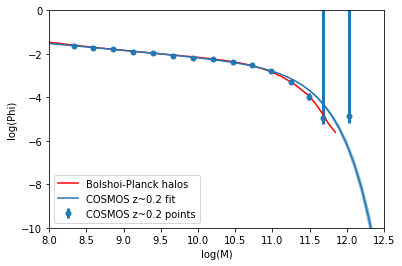

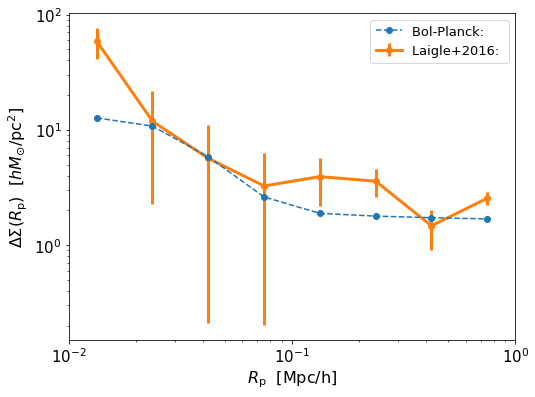

In [30]:
make_analysis_plots(5)

# run 5: SMF only 

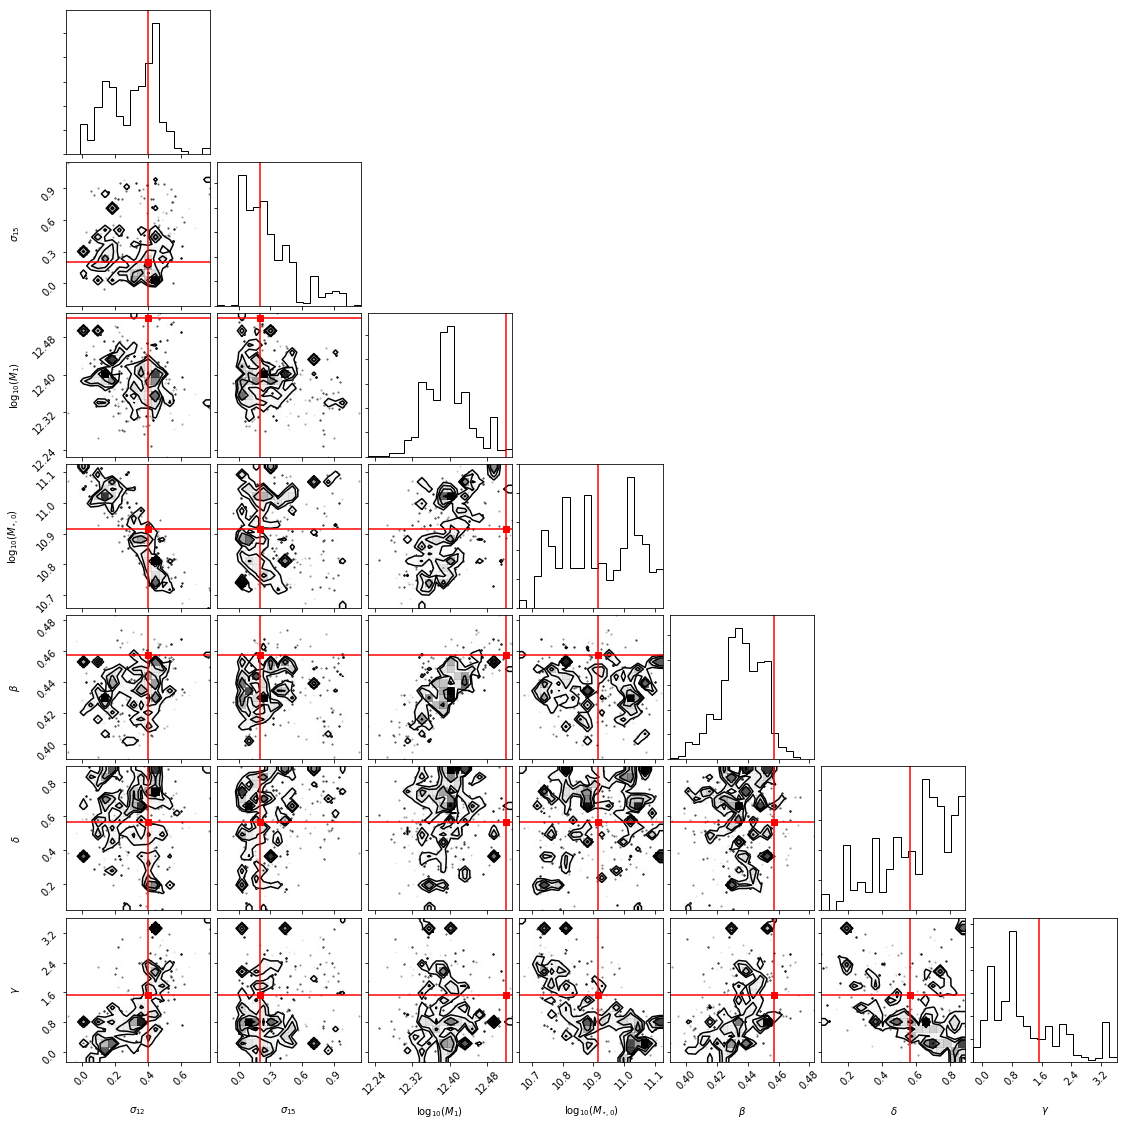

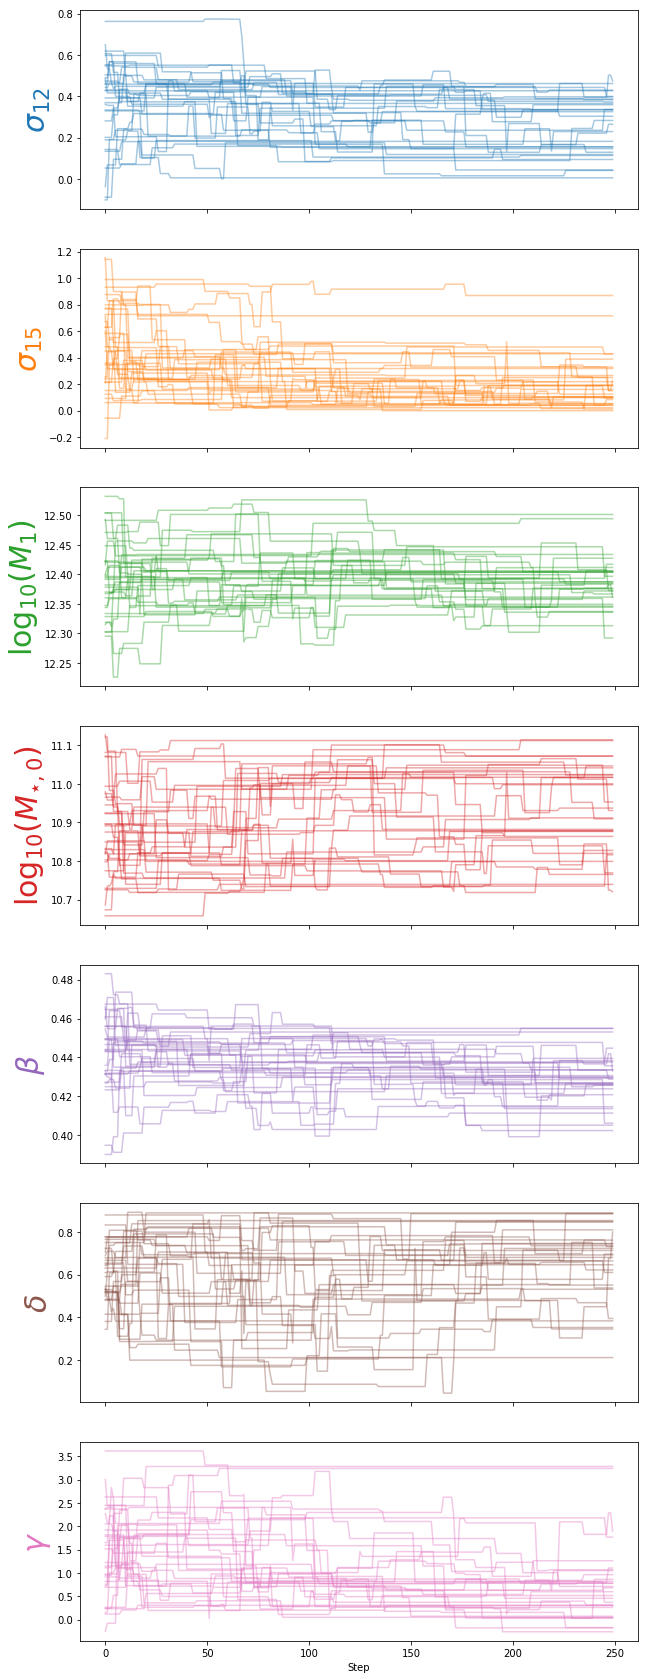

mock.populate
{u'smhm_beta_0': 0.4264954535204722, u'smhm_delta_0': 0.8868556809142754, u'smhm_m0_0': 11.023098246288642, u'smhm_m1_a': 0, u'smhm_m0_a': 0, u'smhm_beta_a': 0, u'smhm_gamma_0': -0.16949324387281606, u'smhm_gamma_a': 0, u'smhm_m1_0': 12.383398714008917, u'scatter_model_param2': 0.3890647113608149, u'smhm_delta_a': 0, u'scatter_model_param1': 0.04117138944836986}
SMF computed
cut galaxies table 1635747
Ks_2sampResult(statistic=0.0031575205222674763, pvalue=0.9999998730782207)
DS computed


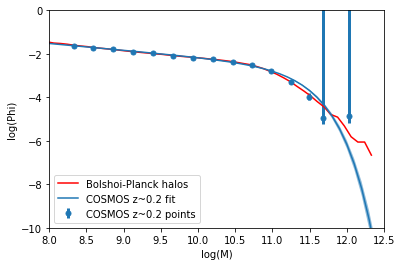

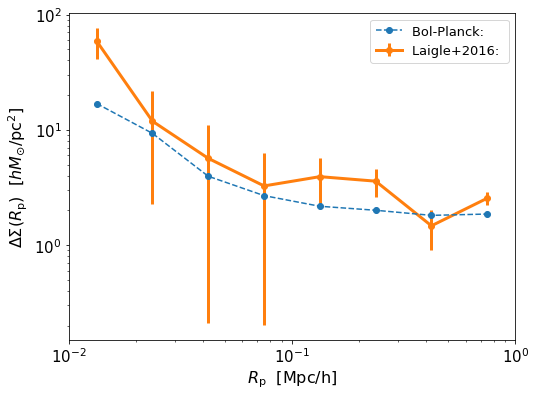

In [34]:
make_analysis_plots('5_SMFonly')

5SHMR+scatter


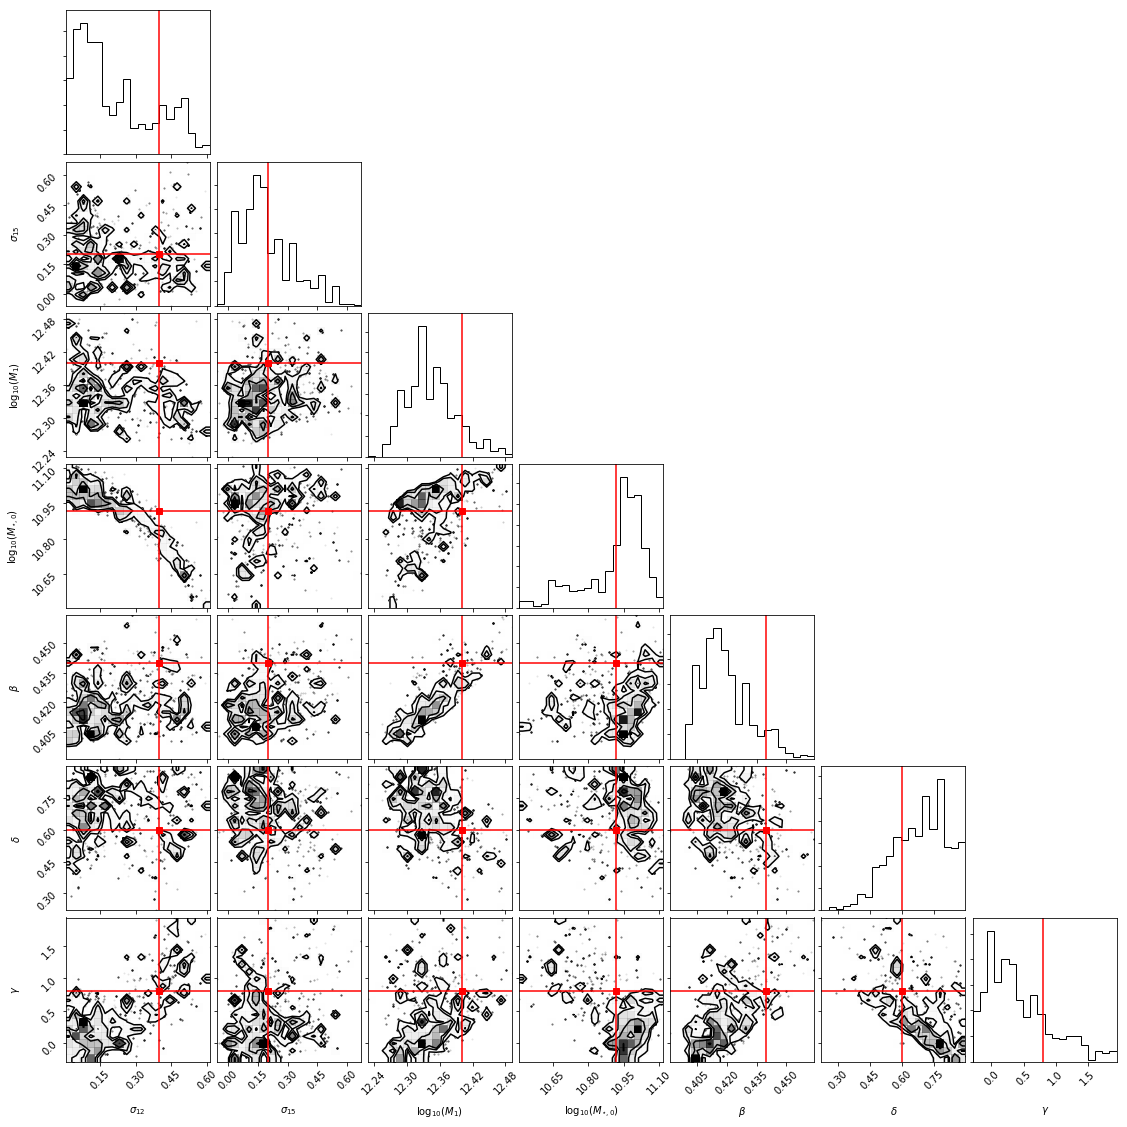

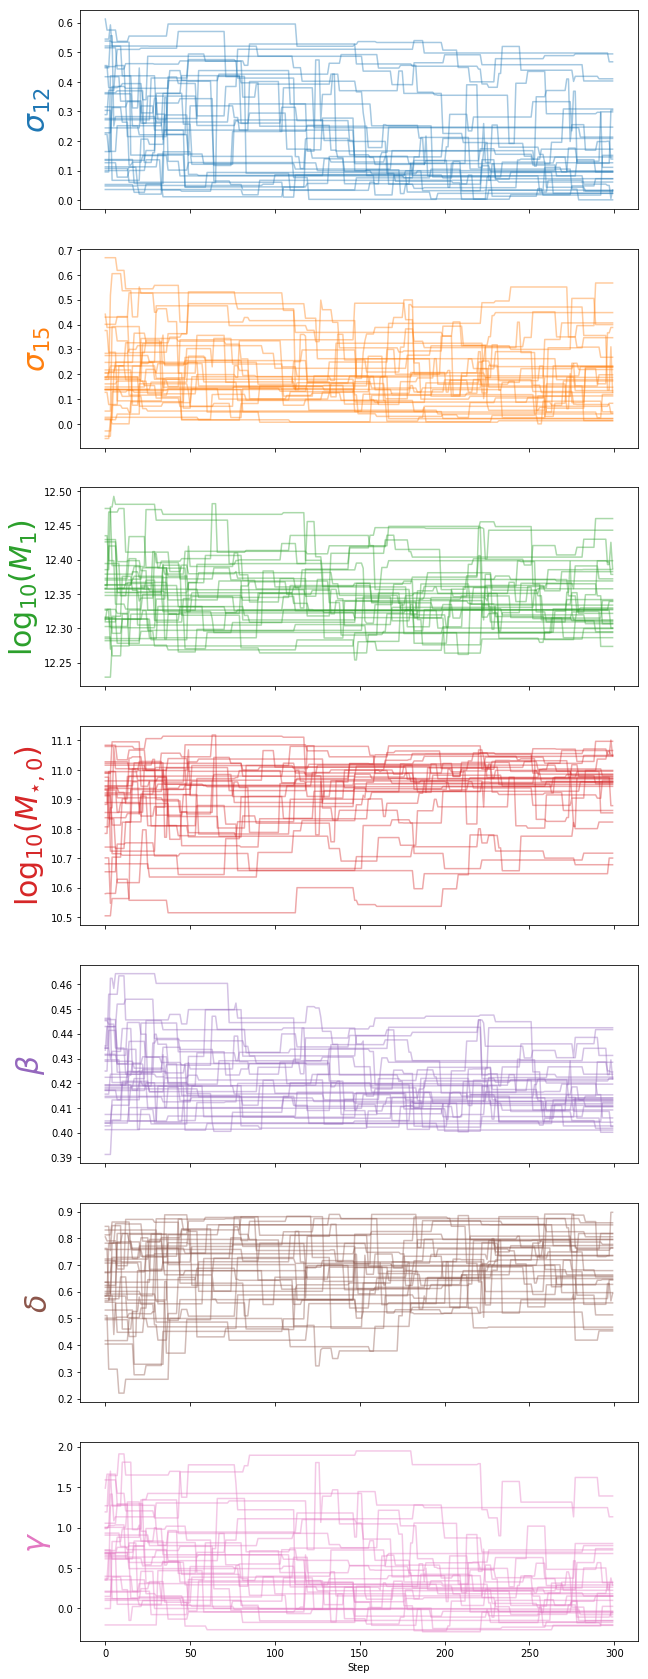

populate_mock
{u'smhm_beta_0': 0.4154854199768784, u'smhm_delta_0': 0.8080984921698663, u'smhm_m0_0': 10.973309348925147, u'smhm_m1_a': 0, u'smhm_m0_a': 0, u'smhm_beta_a': 0, u'smhm_gamma_0': -0.04619878516817938, u'smhm_gamma_a': 0, u'smhm_m1_0': 12.335082275898245, u'scatter_model_param2': 0.11116200626918585, u'smhm_delta_a': 0, u'scatter_model_param1': 0.10548781697508061}
SMF computed
cut galaxies table 1614099
Ks_2sampResult(statistic=0.0020069808027923797, pvalue=1.0000000000000002)
DS computed


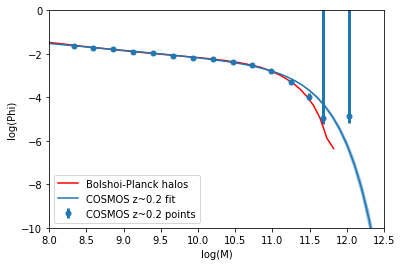

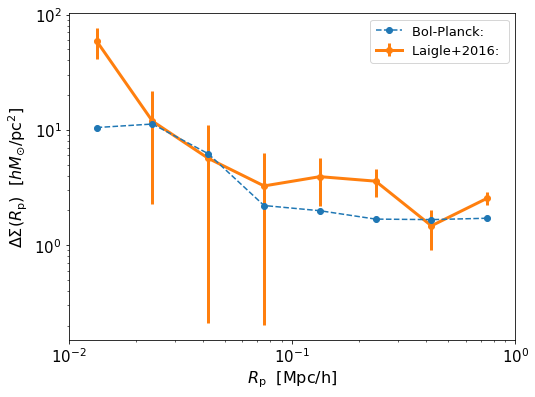

In [10]:
make_analysis_plots('6')

## get scatters and their stdev 

In [14]:
mcmc_array = np.load('outfiles/cosmos_bplanck_run_{}.npz'.format(str(6)))
samples = mcmc_array['samples']
best=mcmc_array['best']
sigma12 = np.array([p[0] for p in samples])
sigma15 = np.array([p[1] for p in samples])

In [5]:
np.std()

['acceptance', 'lnprob', 'samples', 'position', 'chains', 'best']

In [20]:
def non_standard_deviation(sample, value):
    for_all = np.sqrt(np.mean(abs(sample - value)**2))
    upper = np.sqrt(np.mean(abs(sample[sample>value] - value)**2))
    lower = np.sqrt(np.mean(abs(sample[sample<value] - value)**2))
    
    return for_all, upper, lower

In [9]:
print np.mean(samples, axis=0)
print np.std(samples, axis=0)

[ 0.2146876   0.19365041 12.34437617 10.91561135  0.41928629  0.68227001
  0.41687514]
[0.16320762 0.13431415 0.04543086 0.12855062 0.0125304  0.12756609
 0.49569545]


In [15]:
print np.mean(sigma12)
print np.mean(sigma15)

0.2146875995520207
0.19365041166206495


In [24]:
print non_standard_deviation(sigma12, np.mean(sigma12))
print non_standard_deviation(sigma12, best[0])

(0.16320762013615475, 0.19767703980975823, 0.1324000012850414)
(0.19637036381633147, 0.2451176968485749, 0.05333578732104876)


In [25]:
print best

[ 0.10548782  0.11116201 12.33508228 10.97330935  0.41548542  0.80809849
 -0.04619879]


In [26]:
print non_standard_deviation(sigma15, best[1])

(0.15762178933387627, 0.18266951992890193, 0.0667514466252696)


## testing new hdf5 outputs 

In [5]:
def make_analysis_plots_hdf5(run):
    config = parse_config('/Users/fardila/Documents/GitHub/dwarf_lensing/MCMC/config/mcmc_config_{0}.yaml'.format(str(run)))
    config, cosmos_data, sim_data = initial_model(config)
    
    file_name = '/Users/fardila/Documents/GitHub/dwarf_lensing/MCMC/outfiles/cosmos_bplanck_run_{0}.hdf5'.format(str(run))
    reader = emcee.backends.HDFBackend(file_name)
    chains = reader.get_chain()
    log_prob = reader.get_log_prob()
    
    print('{0} walkers'.format(chains.shape[1]))
    print('{0} iterations so far'.format(chains.shape[0]))
    
    #concatenate chains (i.e. flatten array)
    samples = np.concatenate(chains, axis=0)
                         
    #corner plot
    fig = corner.corner(samples, labels=config['param_labels_latex'],
                      truths=config['param_ini'], truth_color='r')
    plt.show()
                         
    #step plots
    f, axes = plt.subplots(7, 1, sharex=True, figsize=[10,30])

    for walker in chains:
        for parameter in range(config['mcmc_ndims']):
            param_chain = [s[parameter] for s in walker]
            axes[parameter].plot(range(len(param_chain)), param_chain, color=new_colors[parameter], alpha=0.4)
            axes[parameter].set_ylabel(config['param_labels_latex'][parameter], color=new_colors[parameter], fontsize=30)
    plt.xlabel('Step') 
    plt.show()
                         
    #plot best
    best_params = samples[np.argmax(log_prob, axis=None)]
    print(best_params)
    plot_from_params(best_params, config, cosmos_data, sim_data)
    plt.show()
                         
    return

5SHMR+scatter (Vmax@Mpeak)
14 walkers
200 iterations so far


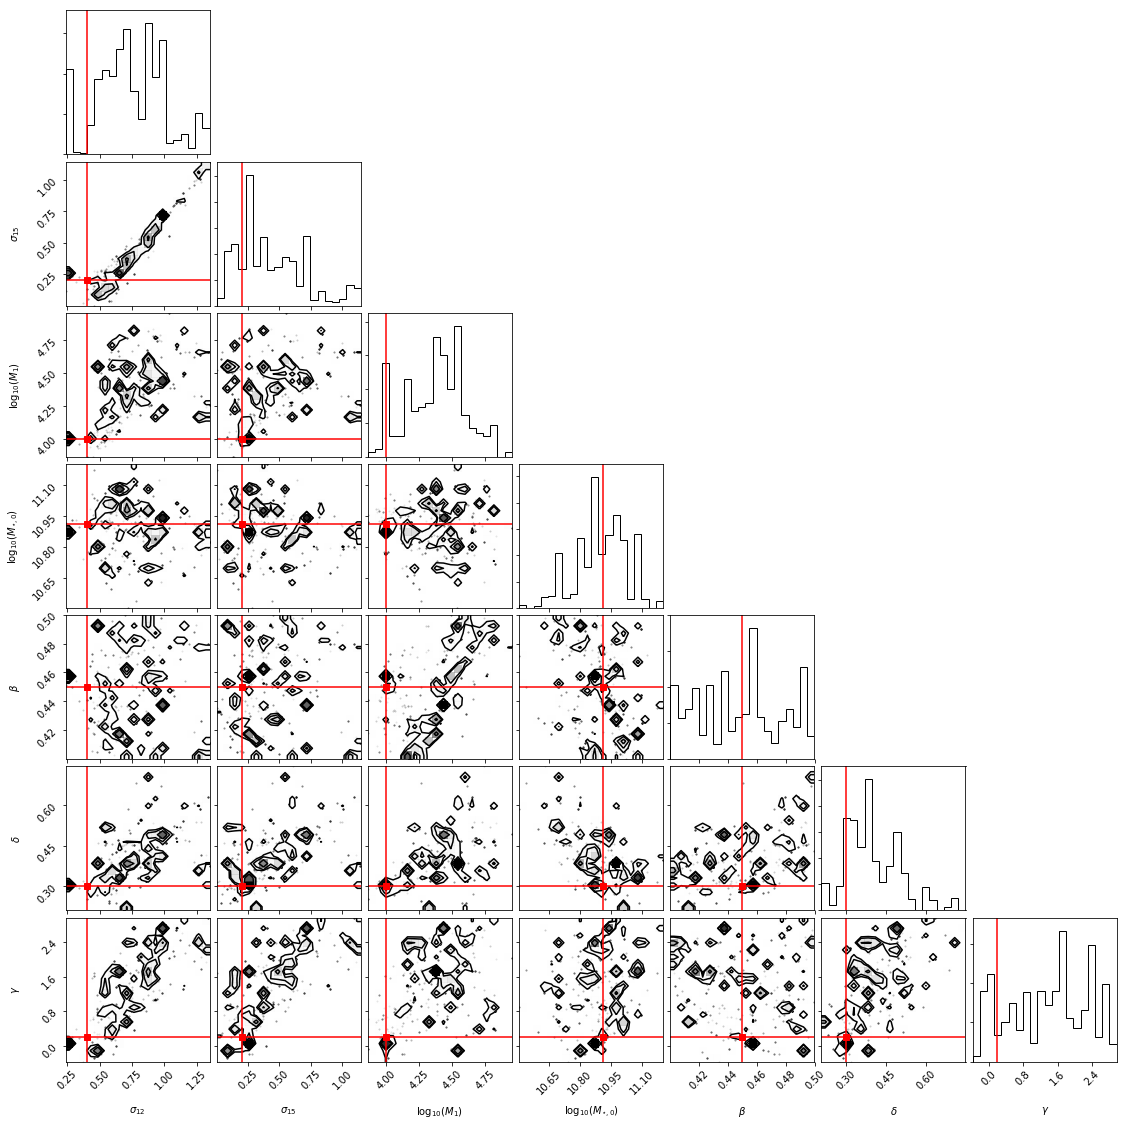

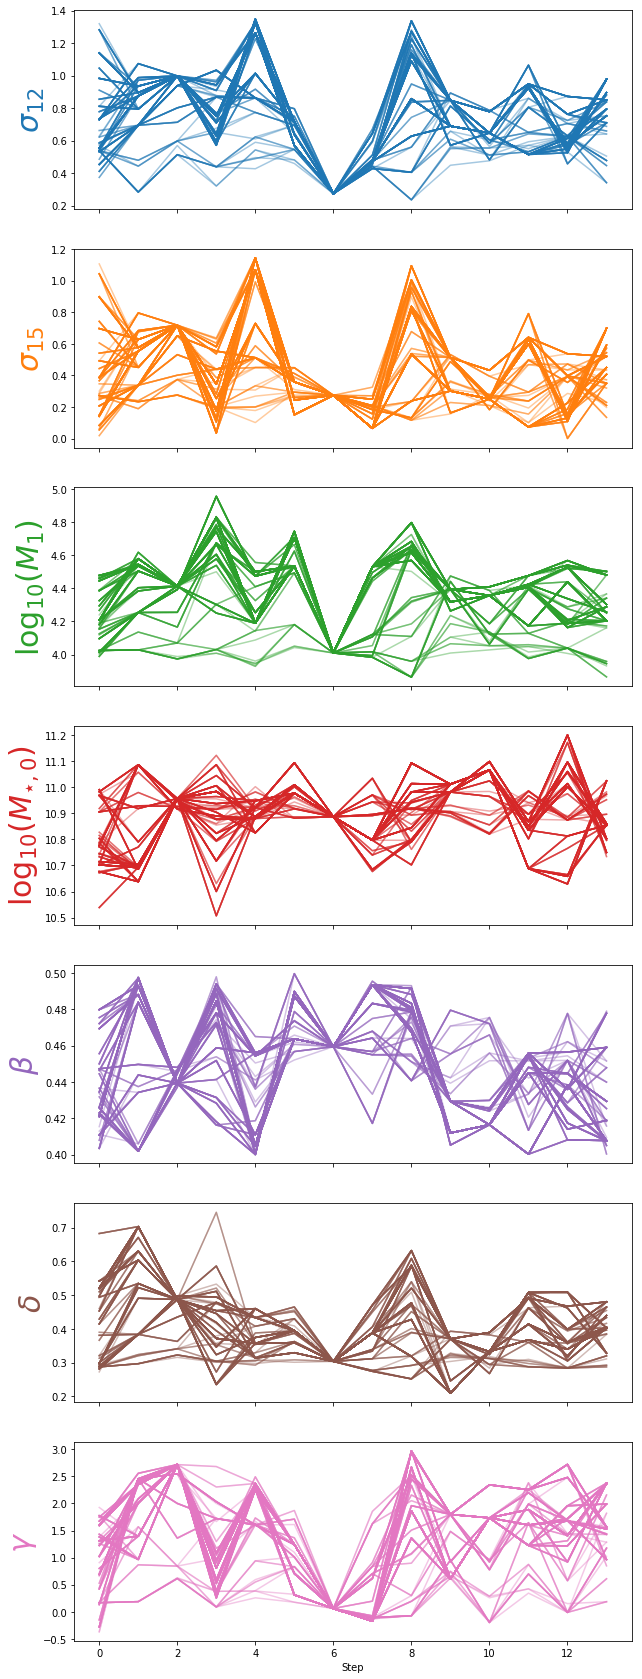

[ 0.9989842   0.71781105  4.41344472 10.95665574  0.43938101  0.4869684
  2.71676583]
USING CHRIS' CODE with halo_Vmax@Mpeak
SMF computed
cut galaxies table 1483885
Ks_2sampResult(statistic=0.0018163014672613054, pvalue=1.0000000000000002)
DS computed


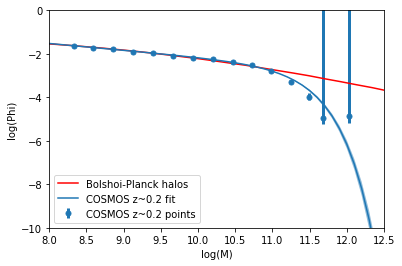

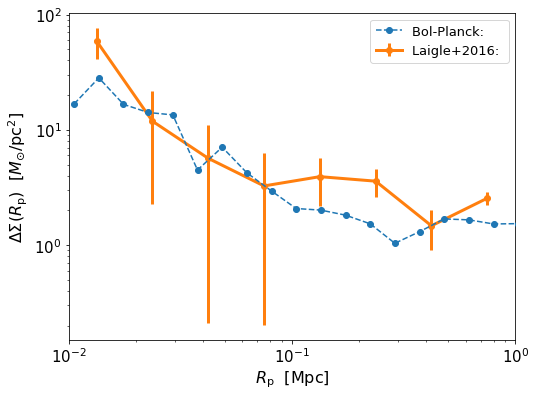

In [6]:
make_analysis_plots_hdf5('Vmax_1')